<a href="https://colab.research.google.com/github/neerja198/Data-Science-Portfolio-in-Python/blob/master/Your_First_Project_in_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predict Who Would Have Survived on Titanic?**

This notebook goes through a basic exploratory data analysis of the Kaggle Titanic dataset with Python It has been setup as an introduction to get you started with exploratory data analysis (EDA).

There are challenges and extensions listed throughout. I encourage you to take the foundations here and build upon them.

If you complete the challenges or get a better score than the one listed at the bottom of this notebook, tweet me and I'llgive your work a shout out.

Happy Data Science,

## **Brainy Data Science**

## **Trained Your Brain in Data Science**

**Download the data**

You can download the data for this notebook here:

https://www.kaggle.com/c/titanic/data



In [0]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Machine Learning
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model

# Visualization 
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

Read the train and test dataset.

In [0]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
gender_submission = pd.read_csv('/content/gender_submission.csv') # example of what a submission should look like


In [4]:
# View the training data
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
len(train)

891

In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
len(test)

418

In [8]:
# View the example submisison dataframe
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


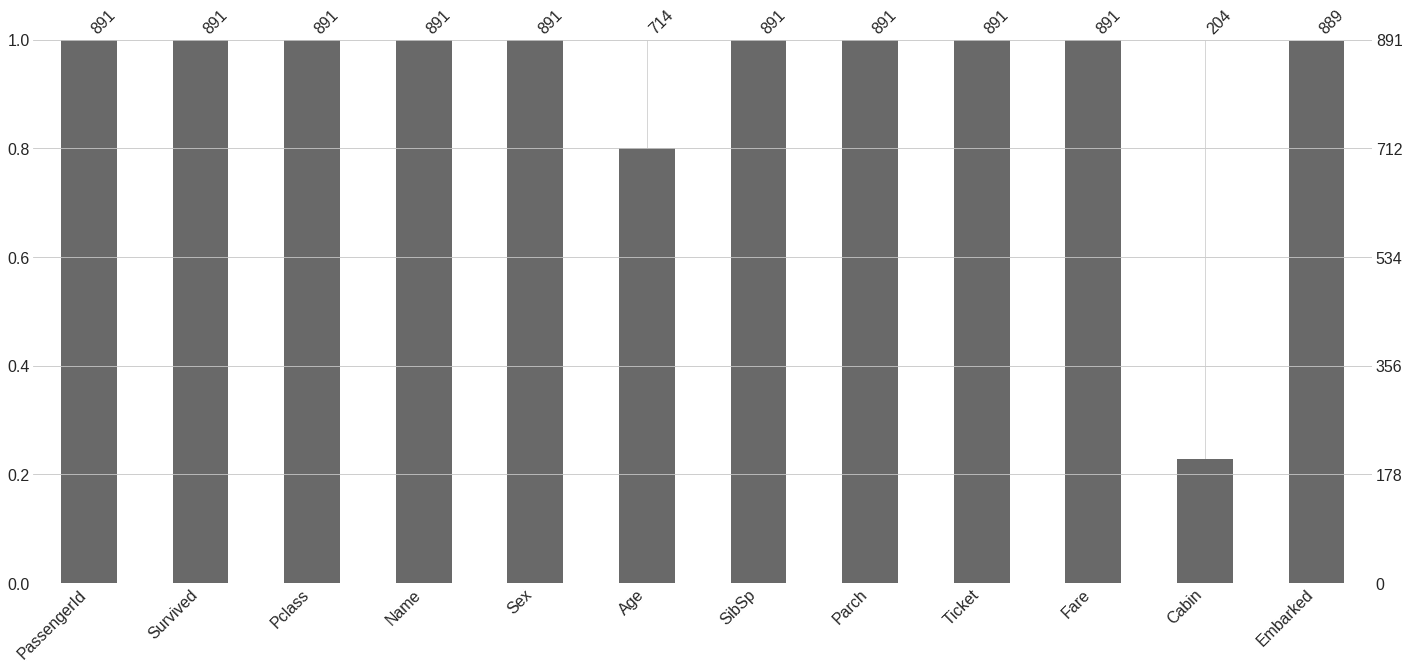

In [10]:
# Plot graphic of missing values
msno.bar(train)

In [11]:
# Alternatively, you can see the number of missing values like this
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**To perform our data analysis, let's divide the data into two new dataframes:**

1. One for exploring discrete continuous variables (continuous variables which have been sorted into some kind of category).

  2.Another for exploring continuous variables.

In [0]:
df_ds = pd.DataFrame() # for discrete continuous variables
df_con = pd.DataFrame() # for continuous variables

In [13]:
#Check the type of Dataset
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [14]:
#let's again take look at train data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In above, Survived is the Target Variable. and
Other features will be used to predict the target feature using model.

0    549
1    342
Name: Survived, dtype: int64


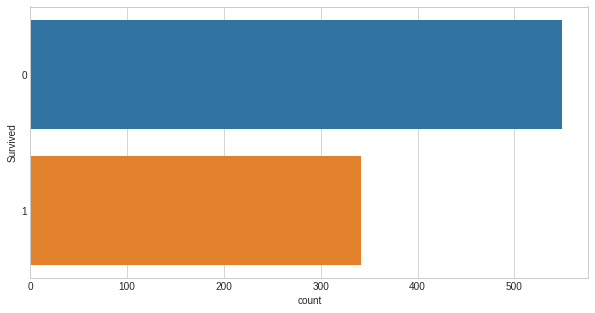

In [15]:
# Let's check about survived count
plt.figure(figsize=(10, 5))
sns.countplot(y="Survived", data=train);
print(train.Survived.value_counts())

In [0]:
# Let's add this to our subset dataframes
df_ds['Survived'] = train['Survived']
df_con['Survived'] = train['Survived']

In [17]:
df_ds.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [18]:
df_con.head()

,Survived
0,0
1,1
2,1
3,1
4,0


**Feature1: Pclass**

**Desc:**The ticket class of the passenger.

Key: 1 = 1st, 2 = 2nd, 3 = 3rd

Let's plot the distribution, to check the type of spread or outliers in dataset.


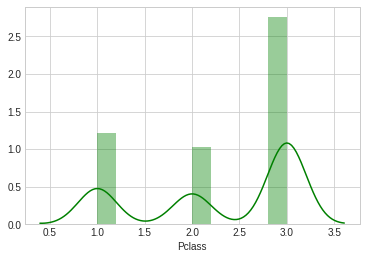

In [75]:
 #Ordinal type of feature
sns.distplot(train['Pclass'], color ='green', bins = 10) 


In [20]:
#Check the missing Values
train.Pclass.isnull().sum()

0

In [0]:
#no missing values, then add into the sub dataframes
df_ds['Pclass'] = train['Pclass']
df_con['Pclass'] = train['Pclass']

**F2:** Name

**Description:** The name of the passenger.

In [22]:
# How many different names are there?
train.Name.value_counts()

Davies, Master. John Morgan Jr                        1
Nysveen, Mr. Johan Hansen                             1
Ryerson, Miss. Susan Parker "Suzette"                 1
Sage, Mr. George John Jr                              1
Goldsmith, Mr. Frank John                             1
                                                     ..
Frauenthal, Mrs. Henry William (Clara Heinsheimer)    1
Sinkkonen, Miss. Anna                                 1
Jonkoff, Mr. Lalio                                    1
Stone, Mrs. George Nelson (Martha Evelyn)             1
Niskanen, Mr. Juha                                    1
Name: Name, Length: 891, dtype: int64

As there are too many unique values of each Passenger ID, We will not take it with us for EDA further as it will slow our EDA.

**F3: Sex**

**Desc:** The sex of the passenger (male or female).

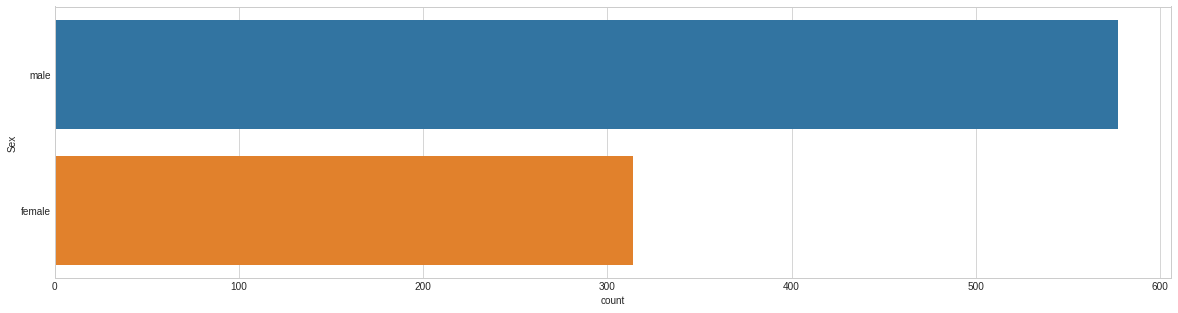

In [23]:
# Let's view the distribution of Sex
plt.figure(figsize=(20, 5))
sns.countplot(y="Sex", data=train);

In [24]:
#Check the missing Values
train.Sex.isnull().sum()

0

In [0]:
# add Sex to the subset dataframes and changed into binary as these are categorical variables
df_ds['Sex'] = train['Sex']
df_ds['Sex'] = np.where(df_ds['Sex'] == 'female', 1, 0) # change sex to 0 for male and 1 for female

df_con['Sex'] = train['Sex']

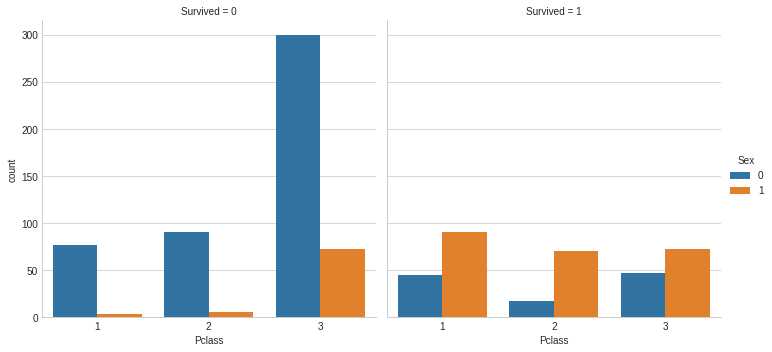

In [26]:
# plot by Pclass, Sex, Survived and check how many survived based on these features
sns.factorplot(x='Pclass', hue='Sex', col='Survived', data=df_ds, kind='count')

**F4: Age**

**Desc:** The age of the passenger.

In [27]:
# How many missing values does age have?
train.Age.isnull().sum()

177

**Challenge:** How would you fill the missing variables in the Age column?

**F5: SibSp**

**Desc:** The number of siblings/spouses the passenger has aboard the Titanic.

In [28]:
# How many missing values does SibSp have?
train.SibSp.isnull().sum()

0

In [29]:
#Check type of values in this feature
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [0]:
# Add SibSp to subset dataframes
df_ds['SibSp'] = train['SibSp']
df_con['SibSp'] = train['SibSp']

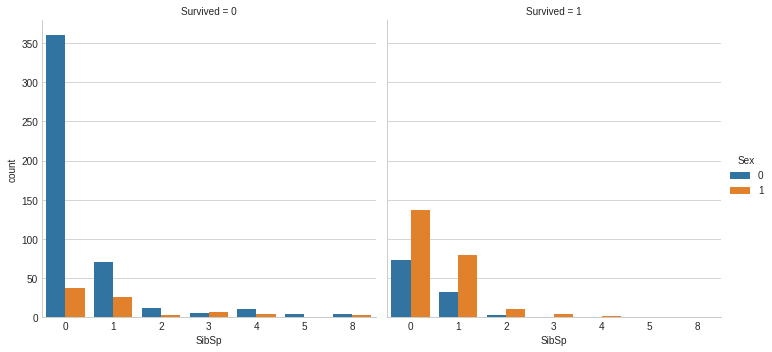

In [31]:
# Visualise the counts of SibSp and the distribution of the values
# against Survived
sns.factorplot(x='SibSp', hue='Sex', col='Survived', data=df_ds, kind='count')

**F6: Parch**

**Desc:**The number of parents/children the passenger has aboard the Titanic. Since this feature is similar to SibSp, we'll do a similar analysis.

In [32]:
# How many missing values does Parch have?
train.Parch.isnull().sum()

0

In [33]:
# What values are there?
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [0]:
# Add Parch to subset dataframes
df_ds['Parch'] = train['Parch']
df_con['Parch'] = train['Parch']

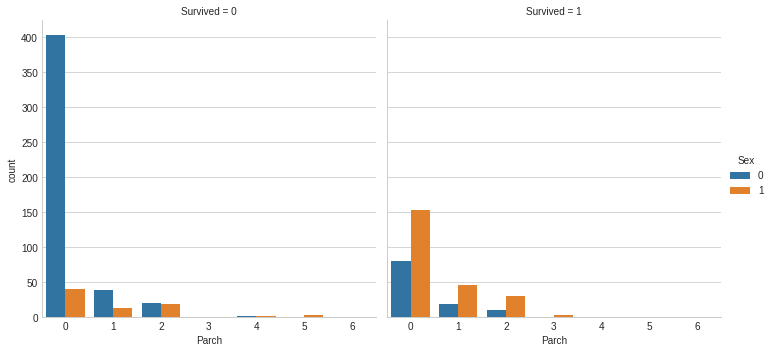

In [35]:
# Visualise the counts of Parch and the distribution of the values against Survived
sns.factorplot(x='Parch', hue='Sex', col='Survived', data=df_ds, kind='count')

In [36]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
df_con.head()

,Survived,Pclass,Sex,SibSp,Parch
0,0,3,male,1,0
1,1,1,female,1,0
2,1,3,female,0,0
3,1,1,female,1,0
4,0,3,male,0,0


**F7: Ticket**

**Desc:** The ticket number of the boarding passenger.

In [38]:
# How many missing values does Ticket have?
train.Ticket.isnull().sum()

0

In [39]:
# How many kinds of ticket are there?
train.Ticket.value_counts()

CA. 2343         7
1601             7
347082           7
CA 2144          6
3101295          6
                ..
PC 17596         1
SC/PARIS 2167    1
113792           1
113059           1
349251           1
Name: Ticket, Length: 681, dtype: int64

In [40]:
# How many unique kinds of Ticket are there?
print("There are {} unique Ticket values.".format(len(train.Ticket.unique())))

There are 681 unique Ticket values.


**Challenge:** How could you reduce the Ticket feature? Is it even possible?




**F8: Fare**

**Desc:** How much the ticket cost.

In [41]:
# How many missing values does Fare have?
train.Fare.isnull().sum()

0

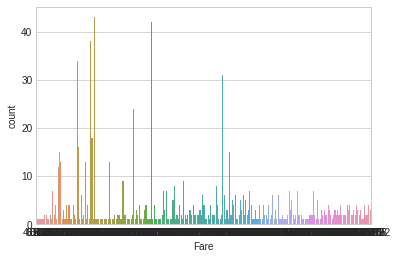

In [42]:
# How many different values of Fare are there?
sns.countplot(x="Fare", data=train);

In [43]:
train.Fare.dtype

dtype('float64')

In [44]:
# How many unique kinds of Fare are there?
print("There are {} unique Fare values.".format(len(train.Fare.unique())))

There are 248 unique Fare values.



Because Fare is a float (number) let's add it as it is to our continuous sub dataframe but to add it to our categorical sub dataframe, we'll cut it into bins.

In [0]:
# Add Fare to sub dataframes
df_con['Fare'] = train['Fare'] 
df_ds['Fare'] = pd.cut(train['Fare'], bins=5) # discretised

In [46]:
# Fare bins look like?
df_ds.Fare.value_counts()

(-0.512, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(409.863, 512.329]      3
(307.398, 409.863]      0
Name: Fare, dtype: int64

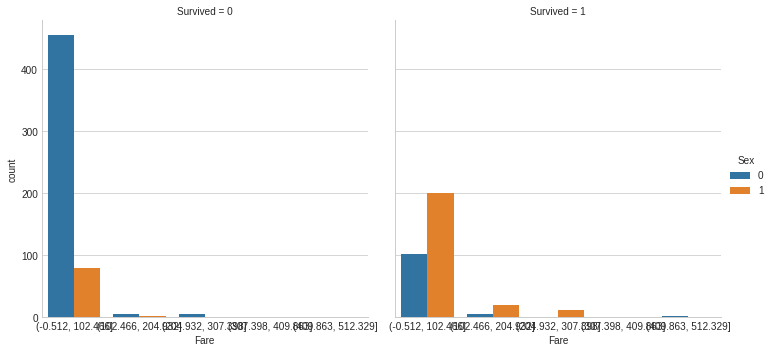

In [47]:
# Visualise the Fare and the distribution of the values against Survived
sns.factorplot(x='Fare', hue='Sex', col='Survived', data=df_ds, kind='count')


**Challenge:** How would you change the Fare bins?

**F9: Cabin**

**Desc:**The cabin number where the passenger was staying.

In [48]:
# How many missing values does Cabin have?
train.Cabin.isnull().sum()

687

In [49]:
# What do the Cabin values look like?
train.Cabin.value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
C22 C26        3
D              3
              ..
A36            1
C85            1
E10            1
D11            1
B37            1
Name: Cabin, Length: 147, dtype: int64

**F10: Embarked**

**Desc:** The port where the passenger boarded the Titanic.

**Key: C = Cherbourg, Q = Queenstown, S = Southampton**

In [50]:
# missing values does Embarked have?
train.Embarked.isnull().sum()

2

In [51]:
# What kind of values are in Embarked?
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

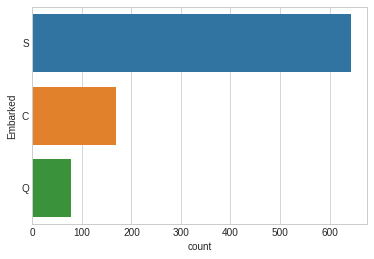

In [52]:
sns.countplot(y='Embarked', data=train);

How can we deal with the 2 missing values of Embarked?

In [53]:
# Add Embarked to sub dataframes and Remove Embarked rows which are missing values
df_ds['Embarked'] = train['Embarked']
df_con['Embarked'] = train['Embarked']
df_con = df_con.dropna(subset=['Embarked'])
df_ds = df_ds.dropna(subset=['Embarked'])
print(len(df_con))

889


# **Feature Engineering**
Now, We will encode our discrete dataframe (df_ds) with one-hot encoding and our continuous dataframe (df_con) with the label encoding function from sklearn.

In [54]:
df_ds.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,"(-0.512, 102.466]",S
1,1,1,1,1,0,"(-0.512, 102.466]",C
2,1,3,1,0,0,"(-0.512, 102.466]",S
3,1,1,1,1,0,"(-0.512, 102.466]",S
4,0,3,0,0,0,"(-0.512, 102.466]",S


In [55]:
#What is one hot encode, Please watch my video Feature Enignnering on Categorical Variables

# One-hot encode discrete or categorical variables
one_hot_cols = df_ds.columns.tolist()
one_hot_cols.remove('Survived')
df_ds_enc = pd.get_dummies(df_ds, columns=one_hot_cols)
df_ds_enc.head()

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,"Fare_(-0.512, 102.466]","Fare_(102.466, 204.932]","Fare_(204.932, 307.398]","Fare_(307.398, 409.863]","Fare_(409.863, 512.329]",Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [56]:
df_con.head(10)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S
5,0,3,male,0,0,8.4583,Q
6,0,1,male,0,0,51.8625,S
7,0,3,male,3,1,21.0750,S
8,1,3,female,0,2,11.1333,S
9,1,2,female,1,0,30.0708,C


In [0]:
# One hot encode the categorical columns
df_embarked_one_hot = pd.get_dummies(df_con['Embarked'], 
                                     prefix='embarked')

df_sex_one_hot = pd.get_dummies(df_con['Sex'], 
                                prefix='sex')

df_plcass_one_hot = pd.get_dummies(df_con['Pclass'], 
                                   prefix='pclass')

In [0]:
# Combine the one hot encoded columns with df_con_enc
df_con_enc = pd.concat([df_con, 
                        df_embarked_one_hot, 
                        df_sex_one_hot, 
                        df_plcass_one_hot], axis=1)

# Drop the original categorical columns (because now they've been one hot encoded)
df_con_enc = df_con_enc.drop(['Pclass', 'Sex', 'Embarked'], axis=1)

In [59]:
#Chekc look at df_con_enc
df_con_enc.head(20)

,Survived,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,0,8.0500,0,0,1,0,1,0,0,1
5,0,0,0,8.4583,0,1,0,0,1,0,0,1
6,0,0,0,51.8625,0,0,1,0,1,1,0,0
7,0,3,1,21.0750,0,0,1,0,1,0,0,1
8,1,0,2,11.1333,0,0,1,1,0,0,0,1
9,1,1,0,30.0708,1,0,0,1,0,0,1,0


## **Start Building Machine Learning Models**

In [0]:
# Seclect the dataframe you want to use first for predictions
choosen_df = df_con_enc

In [61]:
choosen_df.head()

,Survived,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,0,8.0500,0,0,1,0,1,0,0,1


In [0]:

# Split the dataframe into data and labels
X_train = choosen_df.drop('Survived', axis=1) # data
y_train = choosen_df.Survived # labels

In [63]:
# Shape of the data (without labels)
X_train.shape

(889, 11)

In [64]:
X_train.head()

,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,0,71.2833,1,0,0,1,0,1,0,0
2,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,8.0500,0,0,1,0,1,0,0,1


In [65]:
# Shape of the labels
y_train.shape

(889,)

Define a function to fit machine learning algorithms

In [0]:
# Function that runs the requested algorithm and returns the accuracy metrics
def ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

## **Logistic Regression**

In [67]:
# Logistic Regression
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = ml_algo(LogisticRegression(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 79.98
Accuracy CV 10-Fold: 79.42
Running Time: 0:00:02.152230


**K-Nearest Neighbours**

In [68]:
# k-Nearest Neighbours
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = ml_algo(KNeighborsClassifier(), 
                                                  X_train, 
                                                  y_train, 
                                                  10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 83.46
Accuracy CV 10-Fold: 76.72
Running Time: 0:00:00.166191


**Gaussian Naive Bayes**

In [69]:
# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = ml_algo(GaussianNB(), 
                                                                      X_train, 
                                                                      y_train, 
                                                                           10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 78.52
Accuracy CV 10-Fold: 77.95
Running Time: 0:00:00.077192


**Decision Tree Classifier**

In [70]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = ml_algo(DecisionTreeClassifier(), 
                                                                X_train, 
                                                                y_train,
                                                                10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 92.46
Accuracy CV 10-Fold: 80.43
Running Time: 0:00:00.090455


In [71]:
#Compare all models accuracy
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Decision Tree'],
    'Score': [acc_knn, 
        acc_log,  
        acc_gaussian,  
        acc_dt     
    ]})
print("---Reuglar Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Reuglar Accuracy Scores---


,Model,Score
3,Decision Tree,92.46
0,KNN,83.46
1,Logistic Regression,79.98
2,Naive Bayes,78.52


In [72]:
cv_models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Decision Tree'],
    'Score':[acc_cv_knn, 
        acc_cv_log,  
        acc_cv_gaussian,  
        acc_cv_dt     
    ]})
print('---Cross-validation Accuracy Scores---')
cv_models.sort_values(by='Score', ascending=False)

---Cross-validation Accuracy Scores---


,Model,Score
3,Decision Tree,80.43
1,Logistic Regression,79.42
2,Naive Bayes,77.95
0,KNN,76.72


These are all possible options to improve this pipeline. I'd suggest starting with the feature engineering (improving and manipulating the existing data) first.

**What can you do with the Age feature?**

**How would fill up all the missing values?**


**What can you do with the Name feature?**


**What can you do with the Cabin feature?**

**Is there a way to see whether they had a cabin or not?**

Thank You